In [2]:
plt.rcParams["figure.figsize"] = (15,6)

In [2]:
df_raw = pd.read_csv('../train.csv')
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
col_names = df_raw.columns

In [5]:
# count NaN
null_check = df_raw.isnull().sum()
null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
null_count = null_count.query('NaN > 0')
null_count["Me"]

,NaN,column
3,259,LotFrontage
6,1369,Alley
25,8,MasVnrType
26,8,MasVnrArea
30,37,BsmtQual
31,37,BsmtCond
32,38,BsmtExposure
33,37,BsmtFinType1
35,38,BsmtFinType2
42,1,Electrical


In [6]:
df = df_raw

In [7]:
ls = [21,22,23,24,25,27,28,29,30,31,32,33,35,39,40,80]
df1 = df.iloc[:,ls]
df1.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,SalePrice
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,208500
1,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,181500
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,223500
3,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,140000
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,250000


In [8]:
# plot_name 0 : violinplot, 1: boxplot
def show_plot(df,plot_name):
    col_names = df.columns[0:-1]
    for col_name in col_names:
        if plot_name == 0:
            sns.violinplot(x=col_name, y='SalePrice', data=df)
        elif plot_name == 1:
            sns.boxplot(x=col_name, y='SalePrice', data=df)
        plt.show()

In [ ]:
show_plot(df1,0)

In [ ]:
show_plot(df1,1)

In [10]:
# 빈도 표와 두종류의 plot을 함께 출력
def show_plot2(df):
    col_names = df.columns[0:-1]
    for col_name in col_names:
        
        # 어떤 항목인지 출력
        print(col_name)
        
        # 각 항목에 대한 빈도 출력 / df2 dataframe 따로 생성
        df2 = pd.DataFrame(df[col_name])
        counts = df2.groupby([col_name]).size().reset_index(name='Counts')
        print(counts)
        
        # 알파벳 오름차순으로 정렬. 범례 그리지 않는 대신 순서로 각 그래프를 파악
        plot_order = df[col_name].sort_values().unique()
        
        plt.subplot(121)
        sns.violinplot(x=col_name, y='SalePrice', data=df, order=plot_order)
        plt.subplot(122)
        sns.boxplot(x=col_name, y='SalePrice', data=df, order=plot_order)
        plt.show()

RoofStyle
  RoofStyle  Counts
0      Flat      13
1     Gable    1141
2   Gambrel      11
3       Hip     286
4   Mansard       7
5      Shed       2


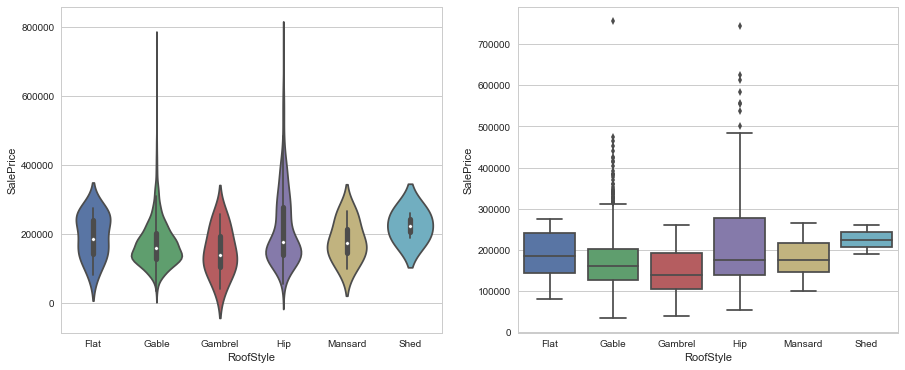

RoofMatl
  RoofMatl  Counts
0  ClyTile       1
1  CompShg    1434
2  Membran       1
3    Metal       1
4     Roll       1
5  Tar&Grv      11
6  WdShake       5
7  WdShngl       6


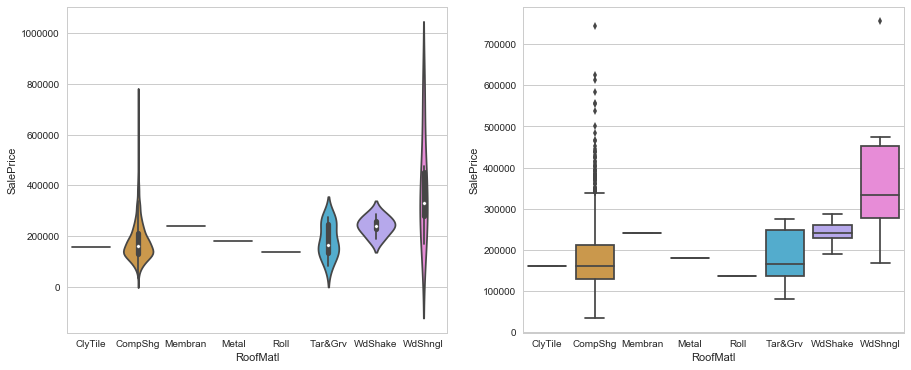

Exterior1st
   Exterior1st  Counts
0      AsbShng      20
1      AsphShn       1
2      BrkComm       2
3      BrkFace      50
4       CBlock       1
5      CemntBd      61
6      HdBoard     222
7      ImStucc       1
8      MetalSd     220
9      Plywood     108
10       Stone       2
11      Stucco      25
12     VinylSd     515
13     Wd Sdng     206
14     WdShing      26


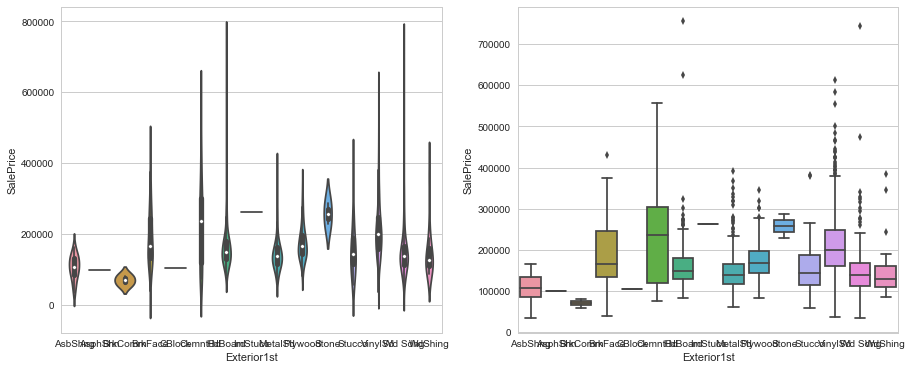

Exterior2nd
   Exterior2nd  Counts
0      AsbShng      20
1      AsphShn       3
2      Brk Cmn       7
3      BrkFace      25
4       CBlock       1
5      CmentBd      60
6      HdBoard     207
7      ImStucc      10
8      MetalSd     214
9        Other       1
10     Plywood     142
11       Stone       5
12      Stucco      26
13     VinylSd     504
14     Wd Sdng     197
15     Wd Shng      38


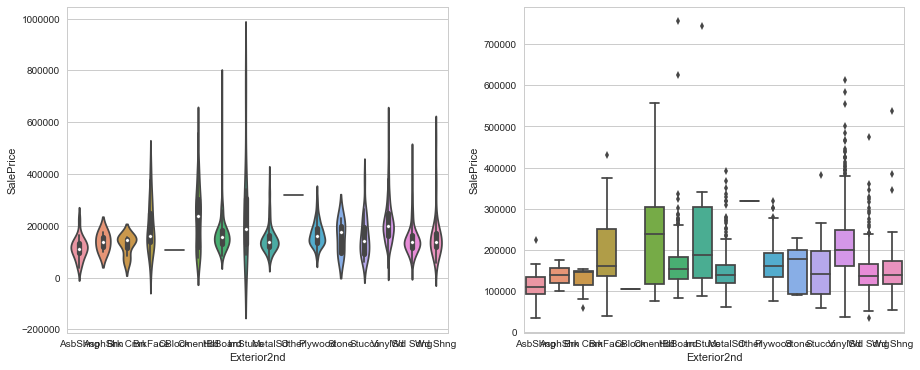

MasVnrType
  MasVnrType  Counts
0     BrkCmn      15
1    BrkFace     445
2       None     864
3      Stone     128


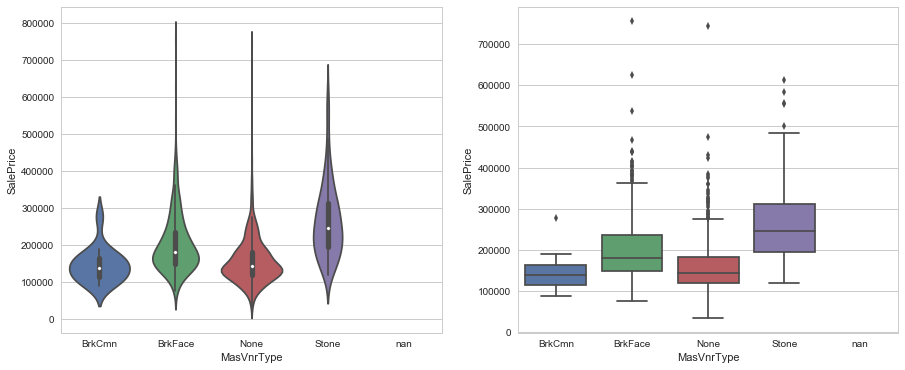

ExterQual
  ExterQual  Counts
0        Ex      52
1        Fa      14
2        Gd     488
3        TA     906


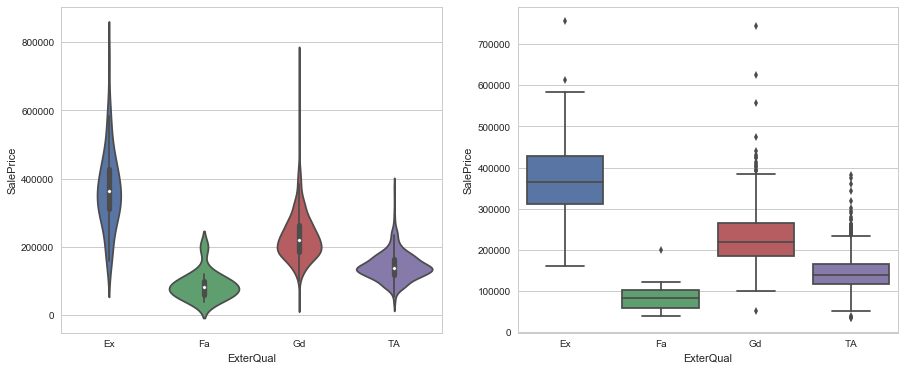

ExterCond
  ExterCond  Counts
0        Ex       3
1        Fa      28
2        Gd     146
3        Po       1
4        TA    1282


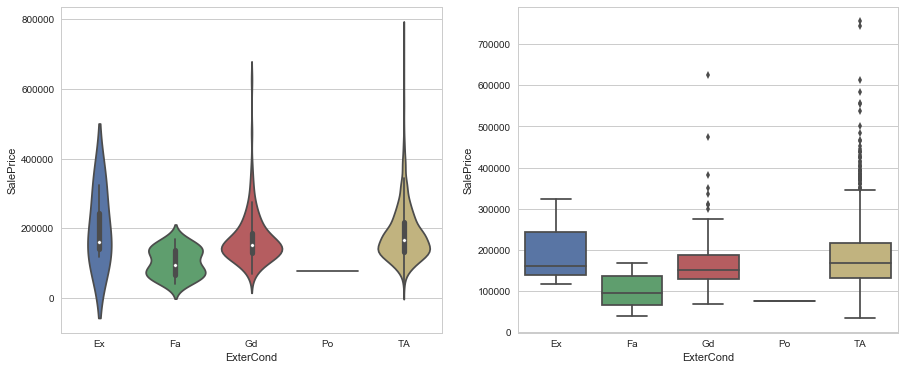

Foundation
  Foundation  Counts
0     BrkTil     146
1     CBlock     634
2      PConc     647
3       Slab      24
4      Stone       6
5       Wood       3


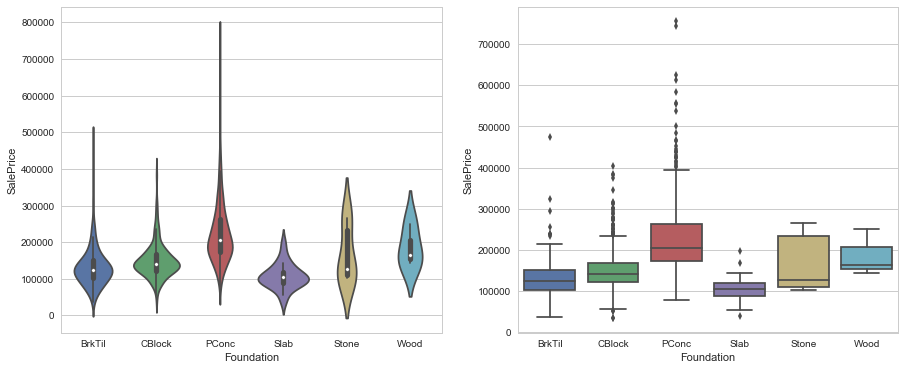

BsmtQual
  BsmtQual  Counts
0       Ex     121
1       Fa      35
2       Gd     618
3       TA     649


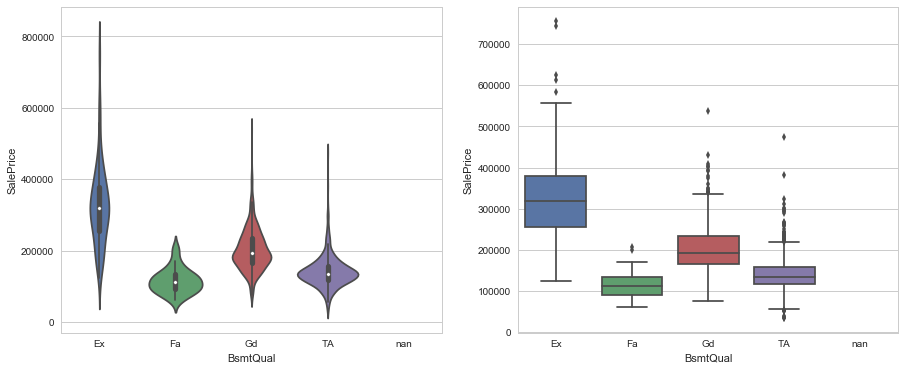

BsmtCond
  BsmtCond  Counts
0       Fa      45
1       Gd      65
2       Po       2
3       TA    1311


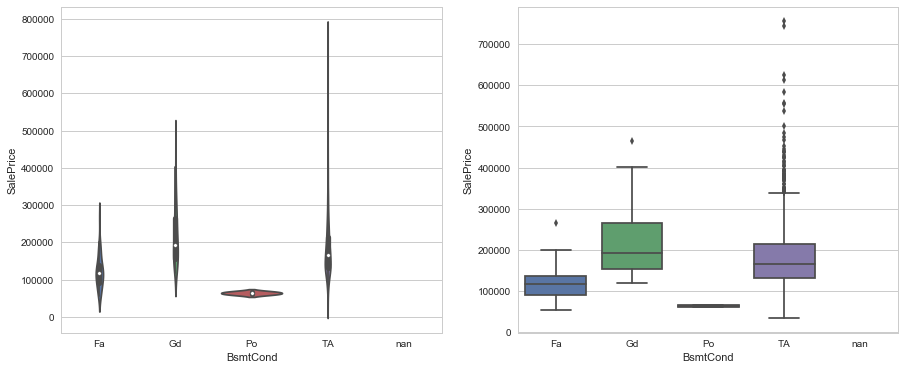

BsmtExposure
  BsmtExposure  Counts
0           Av     221
1           Gd     134
2           Mn     114
3           No     953


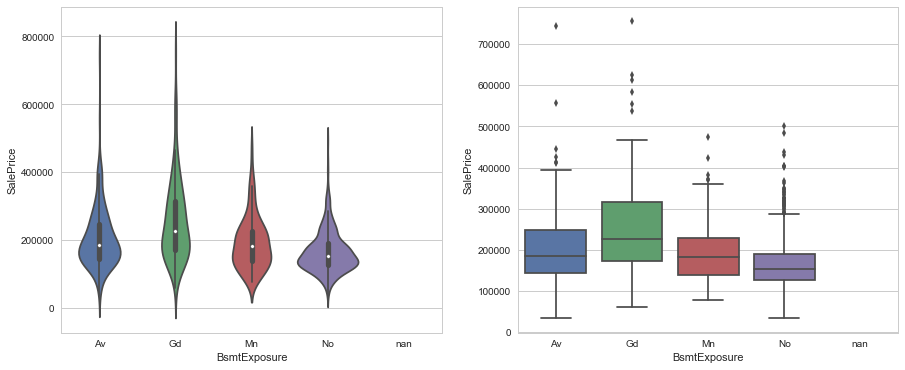

BsmtFinType1
  BsmtFinType1  Counts
0          ALQ     220
1          BLQ     148
2          GLQ     418
3          LwQ      74
4          Rec     133
5          Unf     430


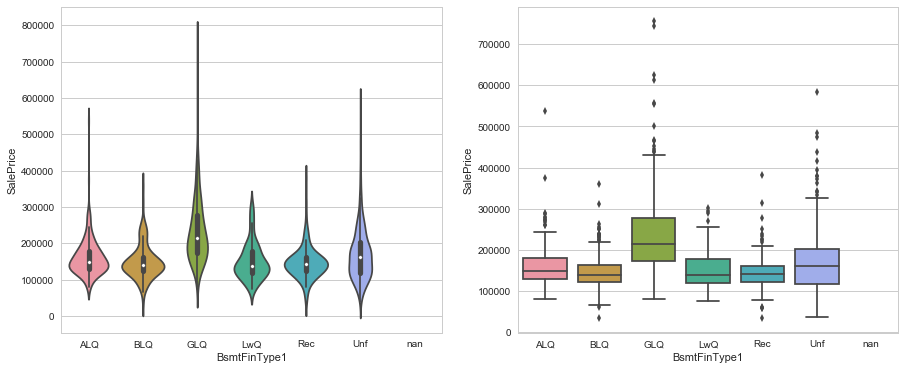

BsmtFinType2
  BsmtFinType2  Counts
0          ALQ      19
1          BLQ      33
2          GLQ      14
3          LwQ      46
4          Rec      54
5          Unf    1256


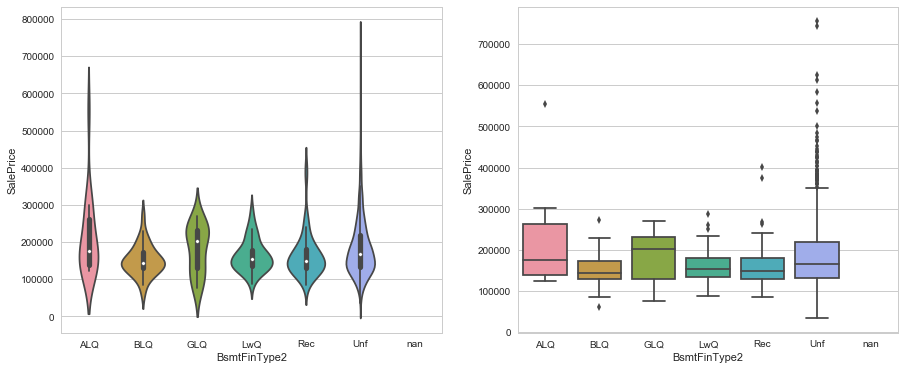

Heating
  Heating  Counts
0   Floor       1
1    GasA    1428
2    GasW      18
3    Grav       7
4    OthW       2
5    Wall       4


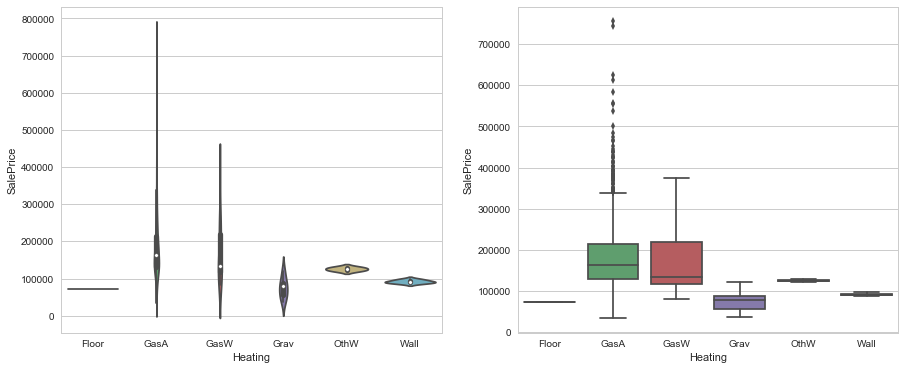

HeatingQC
  HeatingQC  Counts
0        Ex     741
1        Fa      49
2        Gd     241
3        Po       1
4        TA     428


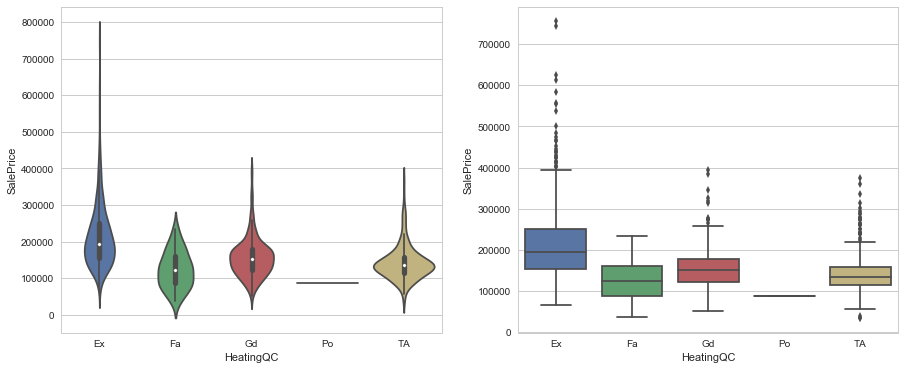

In [11]:
show_plot2(df1)

# 사용하지 않을 데이터

- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtCond
- BsmtFinType2
- Heating

# 사용 가능 후보 데이터
### 항목 중 하나가 100개 이상이며, 다른 항목에 비해 가격이 높은 것을 그래프 상으로 확인
### 가격이 높으나, 해당 항목의 갯수가 너무 적으면 후보에 넣지 않음.

- MasVnrType
- Foundation
- BsmtQual
- BsmtExposure
- BsmtFinType1
- HeatingQC